In [1]:
import os
from glob import iglob

rootdir = '/Users/amogh/dev/python/kpopfreq/data/lyric_files/'
files = [f for f in iglob('**/*', recursive=True) if os.path.isfile(f)]

lyric_files = [f for f in files if f.endswith('lyrics.txt')]

In [2]:
with open('data/korpus.txt', 'wb') as outfile:
    for f in lyric_files:
        with open(f, 'rb') as infile:
            outfile.write(infile.read())

In [3]:
from konlpy.utils import read_txt
from konlpy.utils import load_txt
from konlpy.tag import Okt
t = Okt()

doc_ko = read_txt('data/korpus.txt')

/Users/amogh/anaconda3/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
lines = doc_ko.split('\n')

In [5]:
def remove_extraneous(lines):
    lines = [
        line for line in lines
        if 
        not '[' in line and
        not ']' in line and
        line is not ''
    ]
    
    return lines

In [6]:
lines = remove_extraneous(lines)

In [327]:
import enchant
import string
import re

# exclude contractive apostrophe
punct = '!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~'

def is_all_english(line):
    d = enchant.Dict("en_US")
    for word in line.translate(str.maketrans('', '', punct)).split():
        if not d.check(word):
            return False
    return True

# -*- coding: utf-8 -*-
def is_english(word):
    d = enchant.Dict("en_US")
    if d.check(word):
        return True
    
    try:
        word.encode('ascii')
    except UnicodeEncodeError:
        return False
    else:
        return True
    
def filter_english_words(line):
    d = enchant.Dict("en_US")
    return [w for w in line.translate(str.maketrans('', '', string.punctuation)).split() if not is_english(w)]
        
def remove_english(lines):
    lines = [l for l in lines if not is_all_english(l)]
    lines = [filter_english_words(line) for line in lines]
    return lines

def remove_punctuation(tokens):
    new_tokens = []
    for t in tokens:
        new_token = re.sub(r'[^\w\s]', '', t)
        if new_token is not '':
            new_tokens.append(new_token)
    return new_tokens

def remove_stopwords(tokens):
    filelines = []
    with open('data/stopwords-ko.txt', 'rb') as f:
        filelines = read_txt('data/stopwords-ko.txt')

    stopwords = [l.strip() for l in lines]
    new_tokens = []
    for t in tokens:
        if t not in stopwords:
            new_tokens.append(t)
    return new_tokens

In [328]:
doc_ko = remove_stopwords(remove_extraneous(remove_english(lines)))

In [329]:
doc_ko = (' '.join(str(word) for line in doc_ko for word in line))

In [330]:
from konlpy.tag import Okt
from konlpy.utils import read_txt

import nltk
t = Okt()

tokens_ko = t.morphs(doc_ko)
ko = nltk.Text(tokens_ko, name='lyrics')


In [337]:
print("Document length (number of tokens): {0}".format(len(ko.tokens)))
print("Number of unique tokens: {0}".format(len(set(ko.tokens))))
print("Frequency distribution: ")
ko.vocab()

Document length (number of tokens): 1903
Number of unique tokens: 385
Frequency distribution: 


FreqDist({'하': 109, '다': 100, '이': 75, '로': 45, '면': 42, '에': 41, '어': 41, '지': 37, '여': 34, '그': 33, ...})

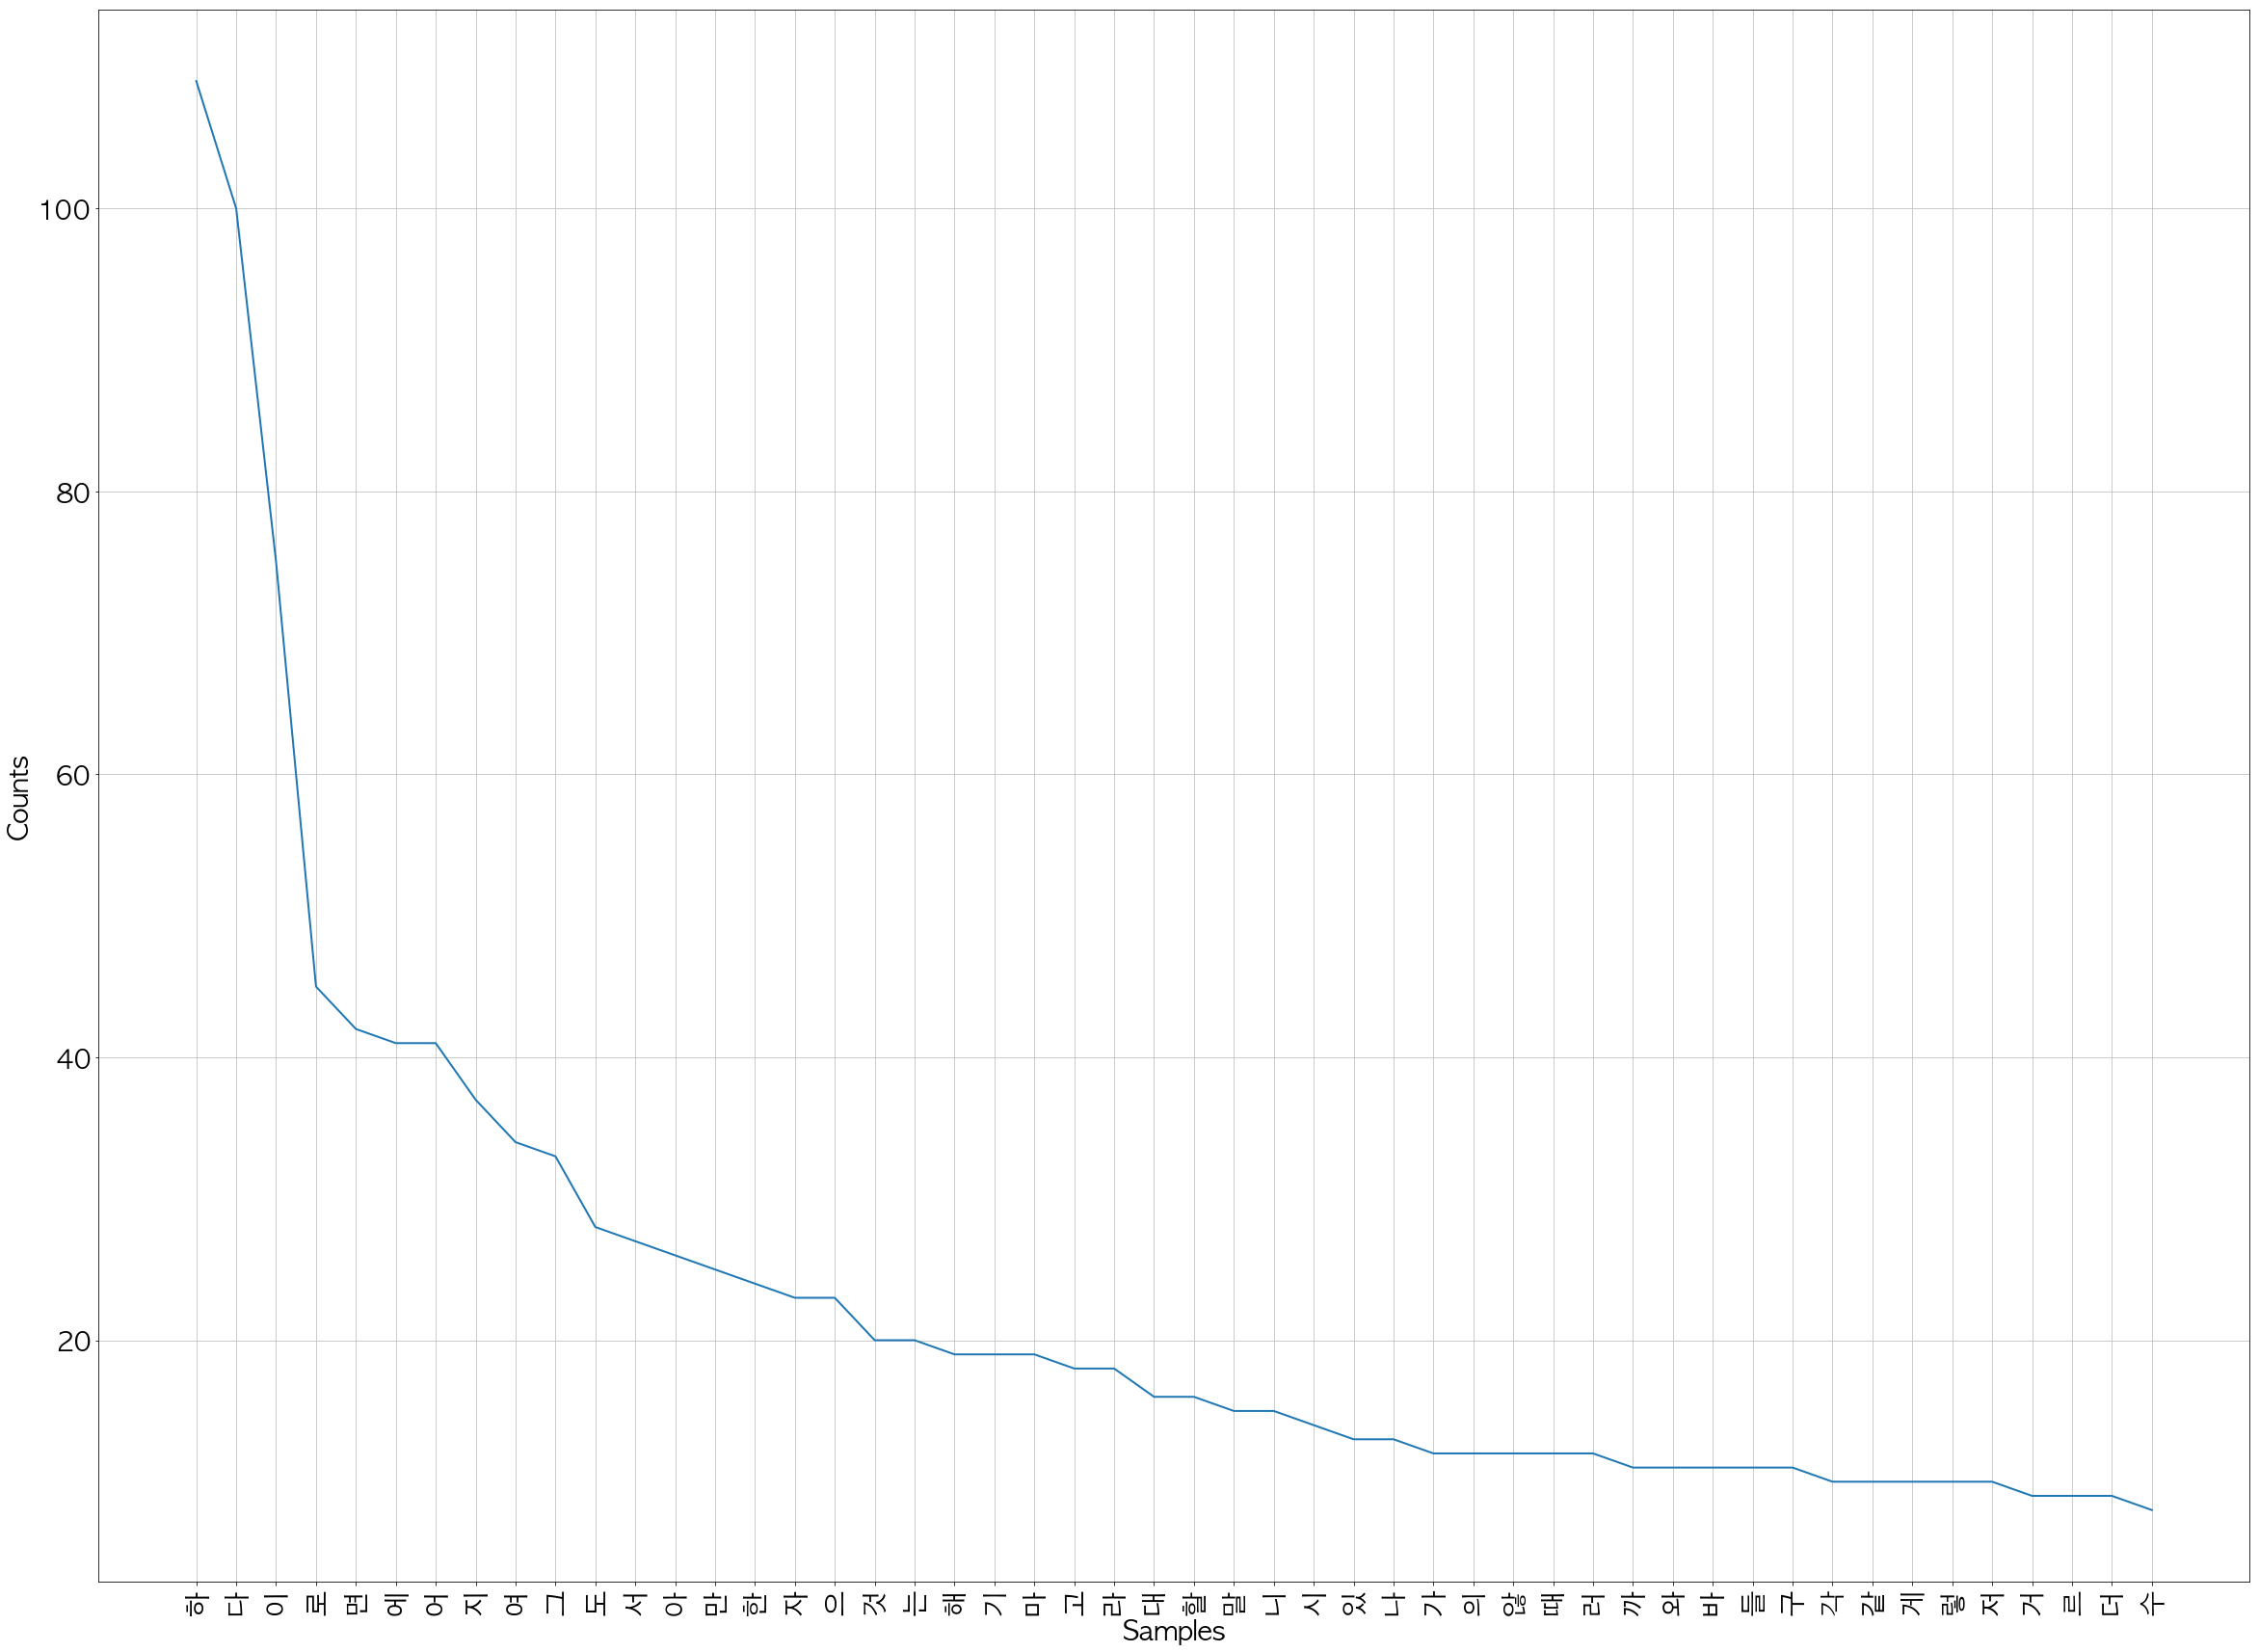

In [369]:
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf
font_name = font_manager.FontProperties(fname=font_fname).get_name()
font = {
    'family': font_name,
    'weight': 'bold',
    'size': 28
}
rc('lines', lw=1.4)
rc('font', **font)

from matplotlib import pylab
import matplotlib.pyplot as plt
pylab.show = lambda: pylab.savefig('plot_50.png')
plt.figure(figsize=(40, 30))

ko.plot(50)